<a href="https://colab.research.google.com/github/aratrika007/ML_Lab/blob/main/Assignment2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.datasets import load_breast_cancer
import matplotlib.pyplot as plt

In [2]:
data = load_breast_cancer()
X = pd.DataFrame(data.data, columns=data.feature_names)
y = pd.Series(data.target, name='target')

# Split the dataset
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.2, random_state=5)
X_valid, X_test, y_valid, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=5)

In [3]:
solvers = ['newton-cg', 'lbfgs', 'liblinear']
for solver in solvers:
    model = LogisticRegression(solver=solver)
    model.fit(X_train, y_train)
    predictions = model.predict(X_valid)
    accuracy = accuracy_score(y_valid, predictions)
    print(f'Solver: {solver}, Accuracy: {accuracy}')

Solver: newton-cg, Accuracy: 0.9649122807017544
Solver: lbfgs, Accuracy: 0.9649122807017544
Solver: liblinear, Accuracy: 0.9649122807017544


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [4]:
penalties = ['l1', 'l2', 'none']

# Using 'liblinear' solver for 'l1' and 'l2' penalties
for penalty in penalties[:2]:
    model = LogisticRegression(penalty=penalty, solver='liblinear')
    model.fit(X_train, y_train)
    coefficients = model.coef_
    predictions = model.predict(X_valid)
    accuracy = accuracy_score(y_valid, predictions)
    print(f"{'-'*40}\nPenalty: {penalty}\n\nCoefficients: \n{coefficients}\n\nAccuracy: {accuracy:.4f}")

# Using 'lbfgs' solver for 'none' penalty
model = LogisticRegression(penalty='none', solver='lbfgs')
model.fit(X_train, y_train)
coefficients = model.coef_
predictions = model.predict(X_valid)
accuracy = accuracy_score(y_valid, predictions)
print(f"{'-'*40}\nPenalty: none\n\nCoefficients: \n{coefficients}\n\nAccuracy: {accuracy:.4f}")

----------------------------------------
Penalty: l1

Coefficients: 
[[ 2.64732334  0.08789701 -0.10234457 -0.00959566  0.          0.
   0.          0.          0.          0.          0.          1.97710703
   0.         -0.09798034  0.          0.          0.          0.
   0.          0.          0.70326589 -0.38531797 -0.05272343 -0.02062646
   0.          0.         -4.68604811  0.          0.          0.        ]]

Accuracy: 0.9649
----------------------------------------
Penalty: l2

Coefficients: 
[[ 1.89758500e+00  1.02466522e-01 -1.22282160e-01  1.81037301e-03
  -1.15795041e-01 -3.36345080e-01 -5.50455360e-01 -2.84036578e-01
  -1.56756060e-01 -1.46005945e-02  5.38919304e-02  1.48307240e+00
   1.64548712e-01 -9.85279428e-02 -1.39717079e-02 -4.07326532e-03
  -6.55970442e-02 -3.43255449e-02 -2.45649822e-02  3.81939507e-03
   1.73110402e+00 -3.61820685e-01 -1.15483305e-01 -2.82036454e-02
  -2.15185374e-01 -8.92214242e-01 -1.36498177e+00 -5.25828114e-01
  -4.82613406e-01 -8.75521

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [5]:
l1_penalties = [0.1, 0.25, 0.75, 0.9]
for penalty in l1_penalties:
    model = LogisticRegression(penalty='l1', C=1/penalty, solver='liblinear')
    model.fit(X_train, y_train)
    coefficients = model.coef_
    print(f"{'-'*40}\nL1 Penalty: {penalty}\n\nCoefficients:\n {coefficients}")

----------------------------------------
L1 Penalty: 0.1

Coefficients:
 [[ 1.16501730e+00  1.17805776e-01  5.06231079e-02 -1.59436901e-02
   0.00000000e+00  0.00000000e+00 -4.49944242e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  3.81190888e+00
  -5.58623905e-01 -1.22668388e-01  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   1.44289456e-01 -5.89401357e-01  1.65911025e-01 -2.04391733e-02
  -1.15755947e+01  6.12253920e-01 -5.79493414e+00 -3.17761864e+01
  -7.19234359e+00  0.00000000e+00]]
----------------------------------------
L1 Penalty: 0.25

Coefficients:
 [[  3.74477394   0.14888115  -0.22023274  -0.02174337   0.
    0.           0.           0.           0.           0.
    0.           3.50885611  -0.26118676  -0.12148387   0.
    0.           0.           0.           0.           0.
    0.          -0.54961079   0.11810944  -0.01770591   0.
    0.          -6.72955575 -13.81188523  -3.9698174    0.  

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


----------------------------------------
L1 Penalty: 0.9

Coefficients:
 [[ 3.8582072   0.10083322 -0.24520813 -0.01322     0.          0.
   0.          0.          0.          0.          0.          2.14834804
   0.         -0.10024635  0.          0.          0.          0.
   0.          0.          0.26825594 -0.40835846 -0.02300969 -0.01775695
   0.          0.         -4.49969155  0.          0.          0.        ]]


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


Average Naive Bayes Accuracy: 0.9362637362637363


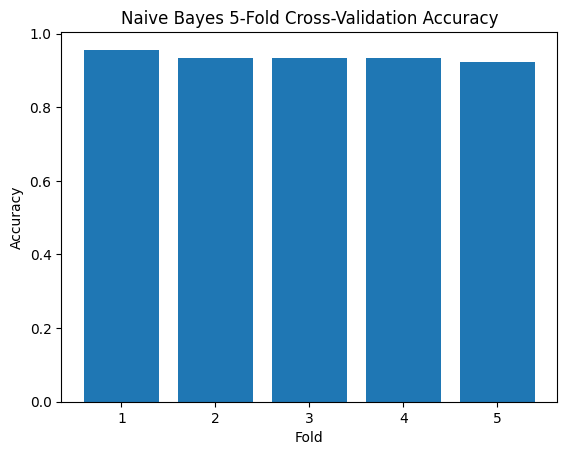

In [6]:
from sklearn.model_selection import cross_val_score
from sklearn.naive_bayes import GaussianNB

nb_model = GaussianNB()
scores = cross_val_score(nb_model, X_train, y_train, cv=5)

average_accuracy = scores.mean()
print(f'Average Naive Bayes Accuracy: {average_accuracy}')

# Plot the bar graph
plt.bar(range(1, 6), scores)
plt.xlabel('Fold')
plt.ylabel('Accuracy')
plt.title('Naive Bayes 5-Fold Cross-Validation Accuracy')
plt.show()
